<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Classifica%C3%A7%C3%A3o_dos_jogadores_FIFA_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#***Classificação dos Jogadores de FIFA 2019***
---

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_da4a8e3caef643c1978f8249fe845729~mv2.jpg" height="350px"></p>

O jogo FIFA é uma das franquias de jogos mais famosas do mundo, a sua primeira edição foi em 1993, porém este só foi entrar nos cenários competitivos dos games, após 2004, com a criação da **FIFA Interactive World Cup**, onde a desenvolvendo reuni os melhores jogadores do mundo numa competição, com uma premiação de milhares de dólares.

Em 2010, o campeonato chegou a entrar no livro dos recordes como o maior game competitivo de todos os tempos, mais adiante em 2012 os números de participantes chegaram a marca de 1,3 milhões. Foi também neste ano que a **final de três dias**, **realizada em Dubai**, foi **transmitida ao vivo no FIFA.com.**

Essa foi um pouco da história do games, onde podemos notar que o seu cenário competitivo cresce cada vez mais, e mediante a isso, uma boa aplicação de novas tecnologias como aprendizado de máquina, servem muito bem.

Confesso que não sou muito bom em futebol, mas o presente projeto incentivou-me a tentar utilizar um pouco do meu conhecimento de Data Science, e ajudar de alguma forma os jogadores.

Mas o que de fato irei fazer aqui? Sabemos que o jogo coleta informações de todos os jogadores dos clubes mais importantes do mundo, como Cristiano Ronaldo, Messi, Neymar e outros. Onde os programadores dos jogos, criam os avatares com a maior semelhança possível, utilizando até mesmo de Data Science, para compreender e classificar quando um jogar corre em média, força do chute e outros atributos.

Dito isto, vou usar características técnicas de cada jogador, com o julgamento de altura, peso e outros, e então agrupá-los em perfis técnicos, investigando então as relações entre os perfis e as suas posições originais.

Obs. No decorrer do texto, irei usar o nome jogador, para identificar os personagens do jogo.


##Importação da base de dados

Para isso, utilizei uma base de dados real, disponível no Kaggle [FIFA 19](https://www.kaggle.com/karangadiya/fifa19), no qual foi retirado do por screpping do site [SOFIFA](https://sofifa.com/).

In [19]:
#importar bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [20]:
df = "https://raw.githubusercontent.com/4m4n5/fifa18-all-player-statistics/master/2019/data.csv"
df = pd.read_csv(df)

In [21]:
df.shape

(18207, 89)

In [7]:
#Mostrar os cinco primeiros atributos
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


O presente dataset, possui **18207 entradas** onde cada uma identifica um jogador e **32 colunas de atributos**.

##Selecionar colunas técnicas importantes

Pode-se ver que o presente datasert, possui diversas camadas, as quais não possuem caracteristicas têcnicas, como: `Photo` , `Flag`, `ID`, `CLub Logo`e outros, os quais iliminaremos do dataset.

In [25]:
#Buscar colunas tecnincas
columns = [21, 26, 27]
columns += range(54, 83)

In [26]:
#Mostrar colunas tecnincas
print (columns)

[21, 26, 27, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [27]:
#Criar novo dataframe de dados tecnicos
df = df.iloc[:, columns]

In [28]:
df.head()

,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


Com o DataSet limpo, podemos dá inicio as análises exploratórias.

##Analise Exploratória
Como qualquer *dataset*, existem um número de valores faltantes, o que identifica a confiabilidade neste, então fiz algumas manipulações para corrigir estes erros.

Mas primeiro vamos ver quantos valores faltantes tem em cada coluna que será utilizada.

In [34]:
#Porcentagem de dados faltantes
(df.isnull().mean()).sort_values(ascending = False)

Position           0.003295
StandingTackle     0.002636
Height             0.002636
Weight             0.002636
Crossing           0.002636
Finishing          0.002636
HeadingAccuracy    0.002636
ShortPassing       0.002636
Volleys            0.002636
Dribbling          0.002636
Curve              0.002636
FKAccuracy         0.002636
LongPassing        0.002636
BallControl        0.002636
Acceleration       0.002636
SprintSpeed        0.002636
SlidingTackle      0.002636
Reactions          0.002636
Balance            0.002636
ShotPower          0.002636
Jumping            0.002636
Stamina            0.002636
Strength           0.002636
LongShots          0.002636
Aggression         0.002636
Interceptions      0.002636
Positioning        0.002636
Vision             0.002636
Penalties          0.002636
Composure          0.002636
Marking            0.002636
Agility            0.002636
dtype: float64

A base de dados apresenta poucos dados faltantes, com apenas **0.329 %** para o mais alto. Porém, para evitar qualquer problema lá na frente, vou corrigir esses problemas logo .

In [35]:
#Comprimento de registro para apagar
len(data.dropna())

18147

In [36]:
#Quanto porcento vai mudar
((len(data) - len(data.dropna()))/ data.shape[0])*100

0.32954358213873786

Este valor indica os mesmos **0.329%**, então isso indica que os mesmos, registos são os que estão faltantes. Desta forma, podemos apagar os registos.

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(18147, 32)

Vamos agora fazer, uma análise rápida das estatísticas de cada variável, tendo em vista para saber se os dados estão dispersos o suficiente para usar o K-Means.

In [22]:
#Cria função plot hist box
def hist_box(feature):
  fig, ax = plt.subplots(1,2)
  ax[0].hist(feature)
  ax[1].boxplot(feature)

In [ ]:
data_describe = data.describe()
data_describe

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336
std,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [23]:
print('                       Gráficos para o minimo')
hist_box(data_describe.loc['min'])

                       Gráficos para o minimo


NameError: ignored

                       Gráficos para o máximo


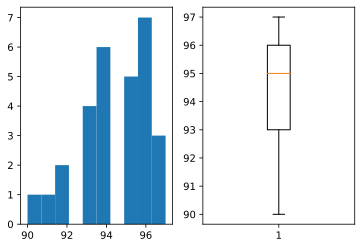

In [ ]:
print('                       Gráficos para o máximo')
hist_box(data_describe.loc['max'])

                       Gráficos para média


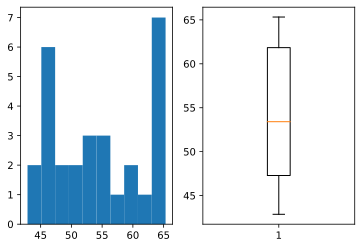

In [ ]:
print('                       Gráficos para média')
hist_box(data_describe.loc['mean'])

Então, foi possível ver, a grande dispersão dos dados, principalmente para os dados de Altura e Peso dos jogadores, então vou ter que fazer alguns tratamentos.

##Pré-processamento dos dados

In [ ]:
data.dtypes

Position            object
Height              object
Weight              object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
dtype: object

As variáveis 'Height'e 'Weight'estão do tipo object, desta forma terei que converter para um tipo numérico.


###Tratamentos das alturas do jogadores

In [ ]:
data.Height.head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

Note que as alturas estão no sistema imperial, sendo necessário converter para centímetros.

In [ ]:
data.Height = data.Height.str.split("\'")
data.Height

0         [5, 7]
1         [6, 2]
2         [5, 9]
3         [6, 4]
4        [5, 11]
          ...   
18202     [5, 9]
18203     [6, 3]
18204     [5, 8]
18205    [5, 10]
18206    [5, 10]
Name: Height, Length: 18147, dtype: object

In [ ]:
#Converter em centimetro
data.Height = [30.48 * int(elem[0]) + 2.54*int(elem[1]) for elem in data["Height"]]
data.Height

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18147, dtype: float64

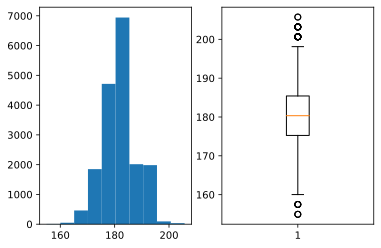

In [ ]:
#Distribuição da frqência da altura
hist_box(data.Height)

###Tratamento dos pesos dos jogadores



In [ ]:
data.Weight.head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

Note que o peso dos jogadores estão em Libras, desta forma irei converter em quilogramas.


In [ ]:
data.Weight = data.Weight.str.split('l')
data.Weight

0        [159, bs]
1        [183, bs]
2        [150, bs]
3        [168, bs]
4        [154, bs]
           ...    
18202    [134, bs]
18203    [170, bs]
18204    [148, bs]
18205    [154, bs]
18206    [176, bs]
Name: Weight, Length: 18147, dtype: object

In [ ]:
data.Weight = [int(elem[0]) * 0.453 for elem in data.Weight]
data.Weight.head()

0    72.027
1    82.899
2    67.950
3    76.104
4    69.762
Name: Weight, dtype: float64

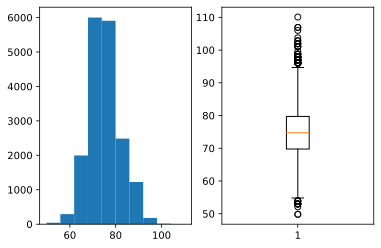

In [ ]:
hist_box(data.Weight)

###Preparação da Base de dados

In [ ]:
position  =  np.array(data.Position)
position

array(['RF', 'ST', 'LW', ..., 'ST', 'RW', 'CM'], dtype=object)

Positivo, ou a posição dos jogadores, não será usado agora, então irei deleitar dos dados, pois o algoritmo K-means somente aceita dados numéricos.

In [ ]:
data = data.drop('Position', axis = 1)

In [ ]:
data.head()

,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,170.18,72.027,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,187.96,82.899,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,175.26,67.950,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,193.04,76.104,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,180.34,69.762,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


###Normalização dos dados

A normalização é uma técnica de escalonização dos dados, este deixa todas as variáveis em mesma escala, tal técnica é extrema importância na utilização de algoritmos que se utilizam de distâncias euclidianas como o K_means, pois estes utilizam os maiores valores para fazerem as relações, causando uma diminuição da precisão do modelo.


In [ ]:
scaler = MinMaxScaler()
data_treino =  scaler.fit_transform(data)

In [ ]:
data_treino

array([[0.3       , 0.36842105, 0.89772727, ..., 0.32967033, 0.28571429,
        0.26136364],
       [0.65      , 0.54887218, 0.89772727, ..., 0.27472527, 0.31868132,
        0.22727273],
       [0.4       , 0.30075188, 0.84090909, ..., 0.26373626, 0.24175824,
        0.34090909],
       ...,
       [0.35      , 0.28571429, 0.22727273, ..., 0.31868132, 0.12087912,
        0.09090909],
       [0.45      , 0.33082707, 0.44318182, ..., 0.18681319, 0.25274725,
        0.27272727],
       [0.45      , 0.4962406 , 0.40909091, ..., 0.40659341, 0.45054945,
        0.53409091]])

#Construção do Modelo

##Identificar o número de agrupamentos com WCSS

O WCSS, é uma técnica que ajuda a identificar o número de agrupamentos, então irei realizar este procedimento para os 11 jogadores possíveis em campo.

In [ ]:
wcss = []
K = range(1,12)

for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_treino)
  wcss.append(km.inertia_)


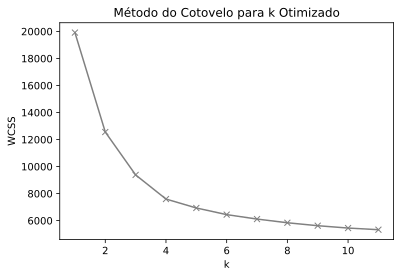

In [ ]:
plt.plot(K, wcss, "bx-", color = "grey")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Método do Cotovelo para k Otimizado");

Desta forma, é possível identificar que o número ideal de agrupamentos `k = 4`, pois ante de 4 os valores possuem quedas muito grandes e depois de 4 muito pequenas.

##Redução das dimensionalidades dos dados
Utilizarei o PCA (Principal Component Analisys) o qual identifica, entre as 30 caracteriasticas as suas dimensionalidades, colando-as em duas dimensões cartesianas, desta forma, possibilitando o plot dos agrupamentos.

In [ ]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_treino)

In [ ]:
data_treino.shape

(18147, 31)

In [ ]:
data_pca.shape

(18147, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.52943566, 0.20404527])

In [ ]:
exp_var = [round(i,1) for i in pca.explained_variance_ratio_ * 100]
exp_var

[52.9, 20.4]

`explained_variance_ratio_` representa as variâncias dos dados, representada nas duas dimensões, a **primeira com 52,9% e a segunda com 20,4%**. 

##Aplicação do k-means
Com o número de agrupamentos definidos como 4, podemos então da início a implementação do modelo k-means

##K-means aplicação

In [ ]:
km = KMeans(n_clusters = 4, n_init = 100, random_state = 0)
km.fit(data_treino)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
#Mostrar os centroides
print(km.cluster_centers_)

[[0.47013853 0.38293013 0.5576947  0.64974042 0.55672615 0.63006471
  0.59752368 0.66477984 0.55792792 0.50148757 0.50811364 0.66493571
  0.71487037 0.72121845 0.69870311 0.52860612 0.67339234 0.66919714
  0.6048123  0.61194385 0.55008338 0.6054462  0.44945108 0.29457726
  0.65413198 0.57697069 0.62462919 0.61157546 0.32979437 0.30457434
  0.27978412]
 [0.65466206 0.53151997 0.10523837 0.10798309 0.11573754 0.23573043
  0.09783045 0.10612113 0.09896511 0.12593179 0.20004933 0.16441772
  0.30959691 0.31790471 0.3193654  0.50540372 0.33857918 0.22087305
  0.53352861 0.21978293 0.54510977 0.10621988 0.18329927 0.1580905
  0.09979789 0.32106444 0.17276537 0.45280116 0.13459505 0.13372222
  0.12617729]
 [0.56041038 0.44628469 0.44585185 0.31361683 0.61720199 0.578172
  0.31988557 0.47179015 0.34797507 0.34161212 0.49725312 0.5396597
  0.57416782 0.59151412 0.52113478 0.50161336 0.54102293 0.4827029
  0.65366124 0.62808096 0.66392828 0.3432104  0.62415821 0.6502162
  0.39670303 0.39151603 0.

In [ ]:
#Mostrar clusters
print(km.labels_)

[0 0 0 ... 0 0 2]


##Relacionamento entre os grupos

Com os agrupamentos já realizado, irei da início a extração de insights, relacionando cada um os jogadores aos seus grupos.


In [ ]:
groups = km.labels_
compar = []
for i in range (0, len(position)):
  elem = tuple ((position[i], groups[i]))
  compar.append(elem)

In [ ]:
compar[0:4]

[('RF', 0), ('ST', 0), ('LW', 0), ('GK', 1)]

In [ ]:
#Quantos registros por grupo
count =  Counter(compar)

In [ ]:
#Novo dataframe
compar =pd.DataFrame({"Position": [i[0] for i in list(count.keys())],
                       "Group": [i[1] for i in list(count.keys())],
                       "N": list(count.values())})

In [ ]:
compar.shape

(77, 3)

In [ ]:
#Ordenando dataset
compar = compar.sort_values(["Position", "Group"])
compar.head()

,Position,Group,N
30,CAM,0,660
64,CAM,2,18
12,CAM,3,280
66,CB,0,1
74,CB,1,1


In [ ]:
compar_percent = pd.DataFrame()
pos = compar.Position.unique()
pos

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [ ]:
#Realizando o filtro
for p in pos:
  compar_p = compar[compar.Position == p]
  sum_N = sum(compar_p["N"])
  compar_p.N = compar_p.N / sum_N
  compar_percent = compar_percent.append(compar_p)

compar_percent = compar_percent.sort_values(["Group", "N", "Position"])

In [ ]:
compar_percent.head()

,Position,Group,N
66,CB,0,0.000562
61,RCB,0,0.001511
71,LCB,0,0.001543
65,RB,0,0.003098
67,CDM,0,0.004219


In [ ]:
compar_percent.tail()

,Position,Group,N
27,CM,3,0.606169
10,LDM,3,0.777778
24,RDM,3,0.778226
8,LCM,3,0.779747
4,RCM,3,0.826087


Com o aqui então desenvolvido, podemos já entender que uma posição pode estar associada a vários grupos, para melhor visualizar farei um gráfico de barras.

In [ ]:
#Criando novo dataset replicando quadro vezes
compar_perc_barplot = pd.DataFrame({'Position': sum([[elem] * 4 for elem in np.unique(position)], []),
                                    'Group': sum([['0', '1', '2', '3'] * len(np.unique(position))], []),
                                    'N': [0] * 4 * len(np.unique(position))})

In [ ]:
compar_perc_barplot.head(8)

,Position,Group,N
0,CAM,0,0
1,CAM,1,0
2,CAM,2,0
3,CAM,3,0
4,CB,0,0
5,CB,1,0
6,CB,2,0
7,CB,3,0


In [ ]:
compar_perc_barplot.shape

(108, 3)

In [ ]:
for row in range(0, len(compar_perc_barplot)):
  pos = compar_perc_barplot.iloc[row, 0]
  gro = int(compar_perc_barplot.iloc[row, 1])
  reg = compar_percent.loc[(compar_percent['Position'] == pos) & (compar_percent['Group'] == gro), :]
  if len(reg) > 0:
    compar_perc_barplot.iloc[row, 2] = reg['N'].values

In [ ]:
compar_perc_barplot.head()

,Position,Group,N
0,CAM,0,0.688935
1,CAM,1,0.000000
2,CAM,2,0.018789
3,CAM,3,0.292276
4,CB,0,0.000562


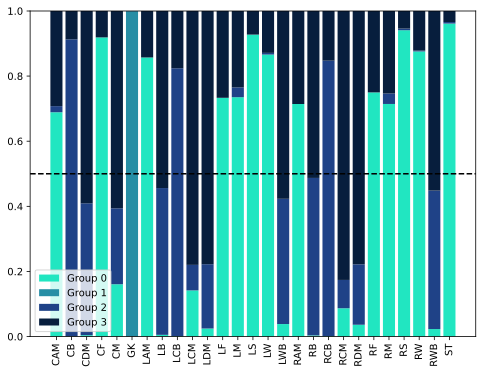

In [ ]:
#Plotar os gráficos conjuntos
plt.figure(figsize= (8,6))
p0 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '0'],
             compar_perc_barplot['N'][compar_perc_barplot['Group'] == '0'], color = '#21e6c1')

p1 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '1'],
             compar_perc_barplot['N'][compar_perc_barplot['Group'] == '1'], color = '#278ea5',
             bottom = np.array(compar_perc_barplot['N'][compar_perc_barplot['Group'] == '0']))

p2 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '2'],
             compar_perc_barplot['N'][compar_perc_barplot['Group'] == '2'], color = '#1f4287',
             bottom = np.array(compar_perc_barplot['N'][compar_perc_barplot['Group'] == '0']) + 
                      np.array(compar_perc_barplot['N'][compar_perc_barplot['Group'] == '1']))

p3 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '3'],
             compar_perc_barplot['N'][compar_perc_barplot['Group'] == '3'], color = '#071e3d',
             bottom = np.array(compar_perc_barplot['N'][compar_perc_barplot['Group'] == '0']) + 
                      np.array(compar_perc_barplot['N'][compar_perc_barplot['Group'] == '1']) +
                      np.array(compar_perc_barplot['N'][compar_perc_barplot['Group'] == '2']))

plt.xticks(rotation = 90)
plt.axhline(0.5, color = 'black', linestyle='--')
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('Group 0', 'Group 1', 'Group 2', 'Group 3'))
plt.show()

Desta forma, definimos as posições e a quais grupos cada uma destas estão associadas.

In [ ]:
counter1 = Counter(compar_percent[compar_percent['N'] >= 0.5]['Group'])
counter1

Counter({0: 13, 1: 1, 2: 3, 3: 10})

###Proporção por grupo

Então a partir das características, podemos então realizar o cálculo da proporção, no qual indica as posições mais importantes para cada grupo.

In [ ]:
#Transformar em dicionario
counter1 = dict(sorted(counter1.items(), key = lambda x: x[0]))
counter1

{0: 13, 1: 1, 2: 3, 3: 10}

In [ ]:
x = [str(elem) for elem in list(counter1.keys())]
x

['0', '1', '2', '3']

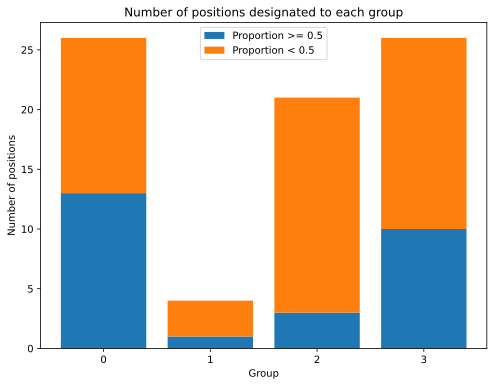

In [ ]:
plt.figure(figsize= (8,6))

p1 = plt.bar(x, counter1.values())

counter2 = Counter(compar_percent[compar_percent['N'] < 0.5]['Group'])
counter2 = dict(sorted(counter2.items(), key = lambda x: x[0]))
x = [str(elem) for elem in list(counter2.keys())]

p2 = plt.bar(x, counter2.values(), bottom=list(counter1.values()))
plt.title('Number of positions designated to each group')
plt.xlabel('Group')
plt.ylabel('Number of positions')
plt.legend((p1[0], p2[0]), ('Proportion >= 0.5', 'Proportion < 0.5'))

E então podemos mostrar as posição mais frequente para cada grupo.


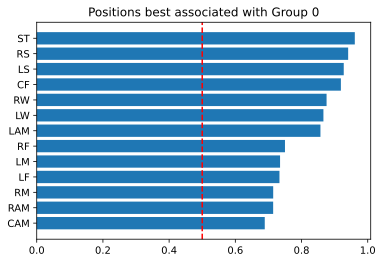

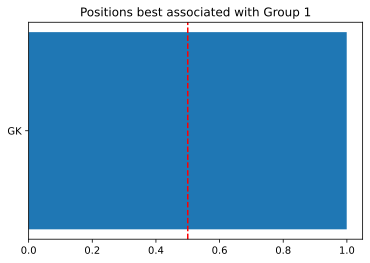

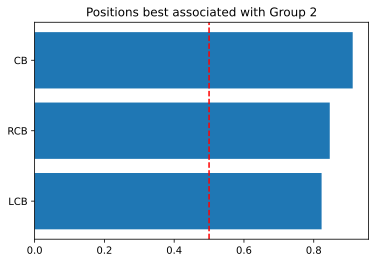

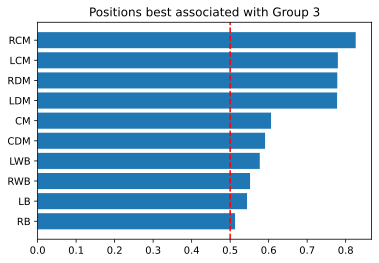

In [ ]:
for i in range(4):
  g = compar_percent[(compar_percent['Group'] == i) & (compar_percent['N'] >= 0.5)][['Position', 'N']]
  g = g.sort_values(by = 'N')
  plt.barh(g['Position'], g['N'])
  plt.axvline(0.5, color = 'r', linestyle = '--')
  plt.title('Positions best associated with Group ' + str(i))
  plt.show()

##Conclusão

Então foi possível concluir que jogadores de futebol do jogo FIFA podem ser separados em 4 perfis técnicos e também determina quais são os recursos técnicos mais importantes para atribuir um jogador ao seu grupo. Uma análise desse tipo seria importante, por exemplo, para verificar se um jogador está atribuído à sua posição mais eficiente no campo e também para sugerir quais recursos técnicos devem ser aprimorados (por treinamento físico) para garantir que um jogador seja um bom representante do perfil técnico desejado.